# Домашнее задание по обучению сверточной сети

В этом задании вы сами (с небольшой помощью) обучите нейронную сеть для классификации кошек и собак! 

Ниже приводится код для считывания данных аналогичный прошлому уроку, поэтому можете его просто запустить.

*Не забудьте добавить в Runtime GPU для ускорения вычислений*.

In [ ]:
pip install tensorflow==2.1.0 #- для обучения

In [ ]:
#pip install tensorflow==2.0.0 #- для TensorRT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [2]:
#%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.7.0'

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68616192/68606236 [==============================] - 2s 0us/step


In [5]:
! ls /root/.keras/datasets/cats_and_dogs_filtered

train  validation  vectorize.py


In [6]:
base_dir = Path(zip_dir).parent / "cats_and_dogs_filtered"
train_dir = base_dir / 'train'
validation_dir = base_dir / 'validation'

train_cats_dir = train_dir / 'cats'
train_dogs_dir = train_dir / 'dogs'
validation_cats_dir = validation_dir / 'cats'
validation_dogs_dir = validation_dir / 'dogs'

In [7]:
num_cats_tr = len(list(train_cats_dir.glob("*")))
num_dogs_tr = len(list(train_dogs_dir.glob("*")))

num_cats_val = len(list(validation_cats_dir.glob("*")))
num_dogs_val = len(list(validation_dogs_dir.glob("*")))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 

In [10]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  
validation_image_generator = ImageDataGenerator(rescale=1./255)  

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
next(train_data_gen)[0].shape

(100, 150, 150, 3)

In [13]:
next(train_data_gen)[1].shape

(100,)

In [14]:
sample_training_images, sample_labels = next(train_data_gen) 

In [15]:
_val_images, _val_labels = next(val_data_gen)
next(val_data_gen)[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [16]:
def show_catsdogs(images, labels, predicted_labels=None):
    names = {0: "Cat", 1: "Dog"}
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {names[labels[i]]}. Pred: {names[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {names[labels[i]]}")

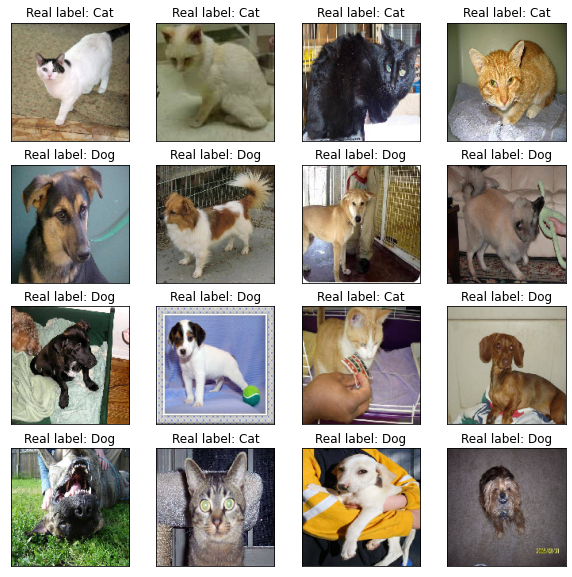

In [17]:
show_catsdogs(sample_training_images, sample_labels)

# Определение модели

**Задание**

Определите модель аналогично модели из урока с классификации одежды.

1. Используйте сверточные слои с размером фильтра (3,3) и relu активацией. Можно оставить паддинг по умолчанию.
2. После каждого сверточного слоя применяйте MaxPool, уменьшающий размер в два раза
3. Увеличивайте количество фильтров в два раза после каждого пуллинга до 128, начиная с 32. Таким образом вы добывите три блока conv+pool
4. Добавьте еще один conv+pool блок с 128 фильтрами
5. Используйте Flatten(), чтобы превратить последний тензор в вектор
6. Добавьте полносвязный слой на 128 признаков
7. Добавьте выходной слой с активацией sigmoid



In [31]:
# < YOUR CODE STARTS HERE > 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [32]:
# < YOUR CODE ENDS HERE >
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [33]:
# должно получиться около 1 000 000 параметров
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 128)     

In [ ]:
# для более удобного и наглядного отображения обучения мы воспользуемся библиотекой,
# которая реализует коллбек, отображающий кривые обучения в режиме реального времени.
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

In [ ]:
%%time
EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    callbacks=[PlotLossesCallback()]) # мы добавили коллбек для отрисовки прогресса

In [34]:
%%timeit -n 100 -r 100

q = model(np.random.rand(1, 150, 150, 3).astype(np.float32))

100 loops, best of 100: 5.9 ms per loop


Теперь посмотрим на предсказания нашей сети:

In [ ]:
shuffle_val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                                              class_mode='binary')
sample_validation_images, sample_validation_labels = next(shuffle_val_data_gen)

Found 1000 images belonging to 2 classes.


In [ ]:
sample_validation_images.shape

(100, 150, 150, 3)

In [ ]:
model.evaluate(val_data_gen) 

  ...
    to  
  ['...']
10/10 [==============================] - 17s 2s/step - loss: 0.6932 - accuracy: 0.5000


[0.6932097792625427, 0.5]

In [ ]:
%%time
predict_x=model.predict(sample_validation_images) 
predicted=np.argmax(predict_x,axis=1)

CPU times: user 2.83 s, sys: 135 ms, total: 2.96 s
Wall time: 1.63 s


In [ ]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
predict_x

In [ ]:
%%time
predicted=model.predict_classes(sample_validation_images) 

CPU times: user 2.85 s, sys: 127 ms, total: 2.98 s
Wall time: 1.62 s


In [ ]:
predicted.flatten()

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

In [ ]:
model.predict

<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f40ceda5450>>

In [ ]:
model.predict_classes

<bound method Sequential.predict_classes of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f40ceda5450>>

In [ ]:
model.save('saved_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/assets


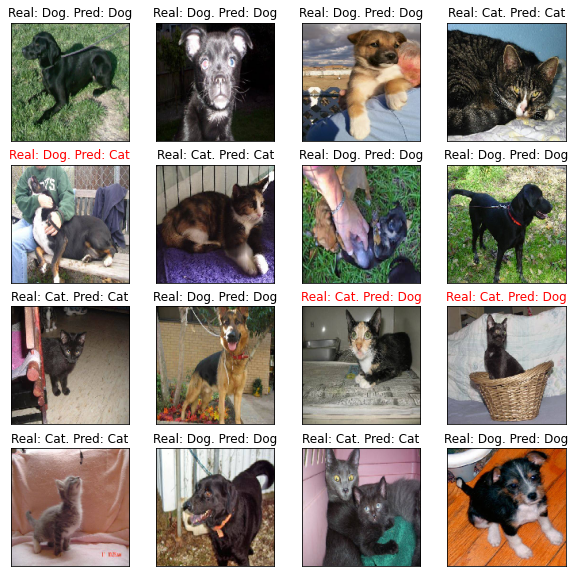

In [ ]:
show_catsdogs(sample_validation_images, sample_validation_labels, predicted.flatten())

# Реализация поканальной сепарабельной свёртки

In [35]:
# < YOUR CODE STARTS HERE > 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', 
                                 activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', 
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.DepthwiseConv2D((3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(1, 1), padding='same', 
                                 activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [36]:
# < YOUR CODE ENDS HERE >
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [37]:
# должно получиться около 1 000 000 параметров
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 128)     

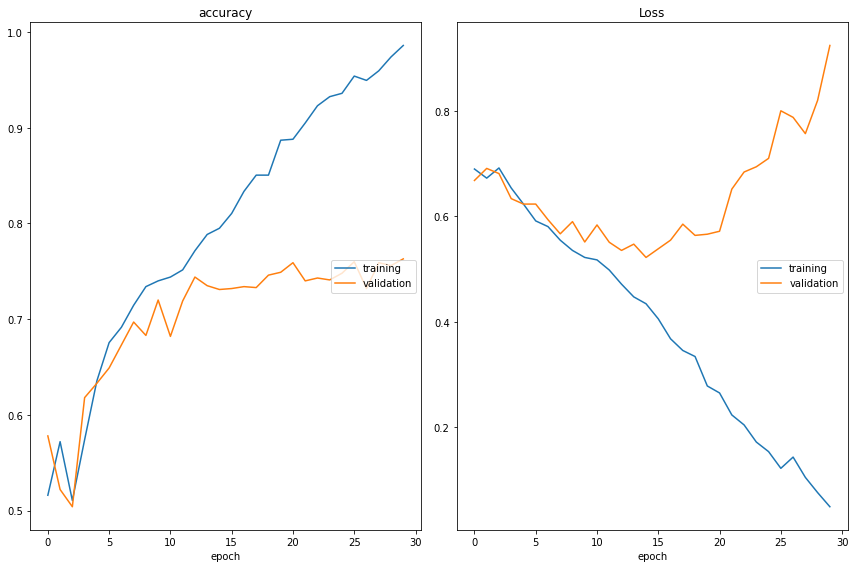

accuracy
	training         	 (min:    0.511, max:    0.986, cur:    0.986)
	validation       	 (min:    0.504, max:    0.763, cur:    0.763)
Loss
	training         	 (min:    0.050, max:    0.692, cur:    0.050)
	validation       	 (min:    0.522, max:    0.924, cur:    0.924)
20/20 [==============================] - 11s 536ms/step - loss: 0.0498 - accuracy: 0.9860 - val_loss: 0.9240 - val_accuracy: 0.7630
CPU times: user 6min 2s, sys: 15.3 s, total: 6min 17s
Wall time: 5min 21s


In [ ]:
%%time
EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    callbacks=[PlotLossesCallback()]) # мы добавили коллбек для отрисовки прогресса

In [38]:
%%timeit -n 100 -r 100

q = model(np.random.rand(1, 150, 150, 3).astype(np.float32))

100 loops, best of 100: 6.56 ms per loop


In [ ]:
model.evaluate(val_data_gen) 

  ...
    to  
  ['...']
10/10 [==============================] - 3s 326ms/step - loss: 0.9240 - accuracy: 0.7630


[0.924011892080307, 0.763]

In [ ]:
%%time
predict_x=model.predict(sample_validation_images) 
predicted=np.argmax(predict_x,axis=1)

CPU times: user 163 ms, sys: 8.05 ms, total: 171 ms
Wall time: 162 ms


In [ ]:
%%time
predicted=model.predict_classes(sample_validation_images) 
predicted

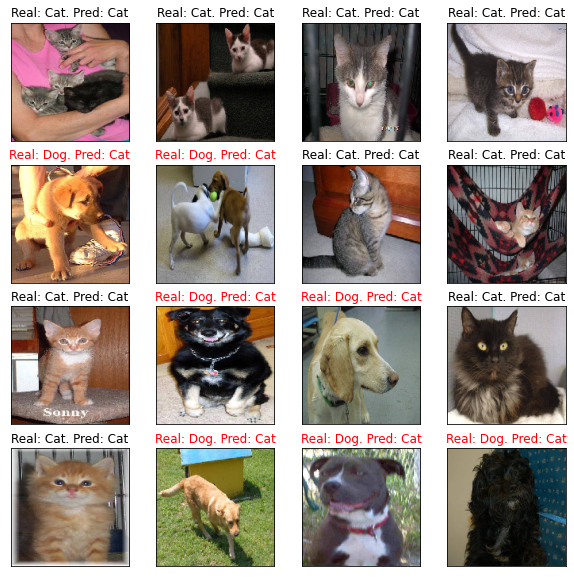

In [ ]:
show_catsdogs(sample_validation_images, sample_validation_labels, predicted)


# Применение TensorRT для оптимизации нейросетей

In [ ]:
 # уменьшила версию для TensorRT

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow.python.compiler.tensorrt import trt_convert as trt

In [ ]:
tf.__version__

'2.0.0'

In [ ]:
converter = trt.TrtGraphConverterV2(input_saved_model_dir='saved_model') #input_saved_model_dir='saved_model'
converter.convert()
converter.save('saved_model_trt')

INFO:tensorflow:Linked TensorRT version: (0, 0, 0)
INFO:tensorflow:Loaded TensorRT version: (0, 0, 0)
INFO:tensorflow:Running against TensorRT version 0.0.0
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model_trt/assets


In [ ]:
model_trt = tf.keras.models.load_model('saved_model_trt')

In [ ]:
model = tf.keras.models.load_model('saved_model')

In [ ]:
%%timeit -n 10 -r 10

q = model_trt(np.zeros((1, 150, 150, 3), dtype=np.float32))

10 loops, best of 10: 18.4 ms per loop


In [ ]:
%%timeit -n 10 -r 10

q = model(np.zeros((1, 150, 150, 3), dtype=np.float32))

10 loops, best of 10: 26.2 ms per loop


# Предсказание на одной картинке (для дз 19)

In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('saved_model')

In [ ]:
pic = Image.open("собака.jpg")
pic = pic.resize((150, 150), Image.ANTIALIAS)
pix = np.array(pic.getdata()).reshape(1, pic.size[0], pic.size[1], 3) / 255.

In [ ]:
pix.shape

(1, 150, 150, 3)

In [ ]:
predict_x=model.predict(pix)
predict_x

array([[0.99921036]], dtype=float32)

In [ ]:
predicted=np.argmax(predict_x,axis=1)
predicted

array([0])